# Exploratory Data Analysis

In [32]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

DATA_FN = '../data/original_data.csv'
TWITTER_BLUE = '#1DA1F2'
TWITTER_GRAY = '#657786'

print('Features\n---------')
df = pd.read_csv(DATA_FN, index_col=[0])
for col in df.columns:
    print(col)

Features
---------
created_at
default_profile
default_profile_image
description
favourites_count
followers_count
friends_count
geo_enabled
id
lang
location
profile_background_image_url
profile_image_url
screen_name
statuses_count
verified
average_tweets_per_day
account_age_days
account_type


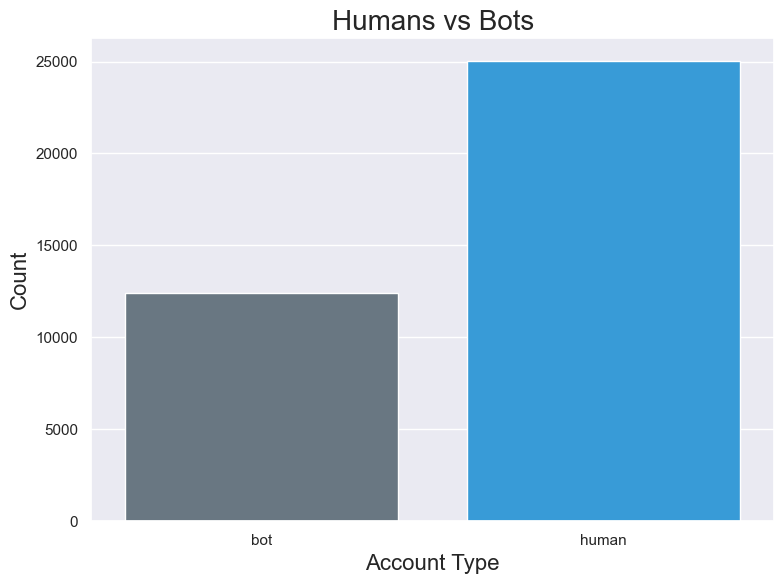

In [33]:
# Number of humans vs bots
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.countplot(x='account_type', data=df, palette=['#657786', TWITTER_BLUE])
plt.title('Humans vs Bots', fontsize=20)
plt.xlabel('Account Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.tight_layout()
plt.show()

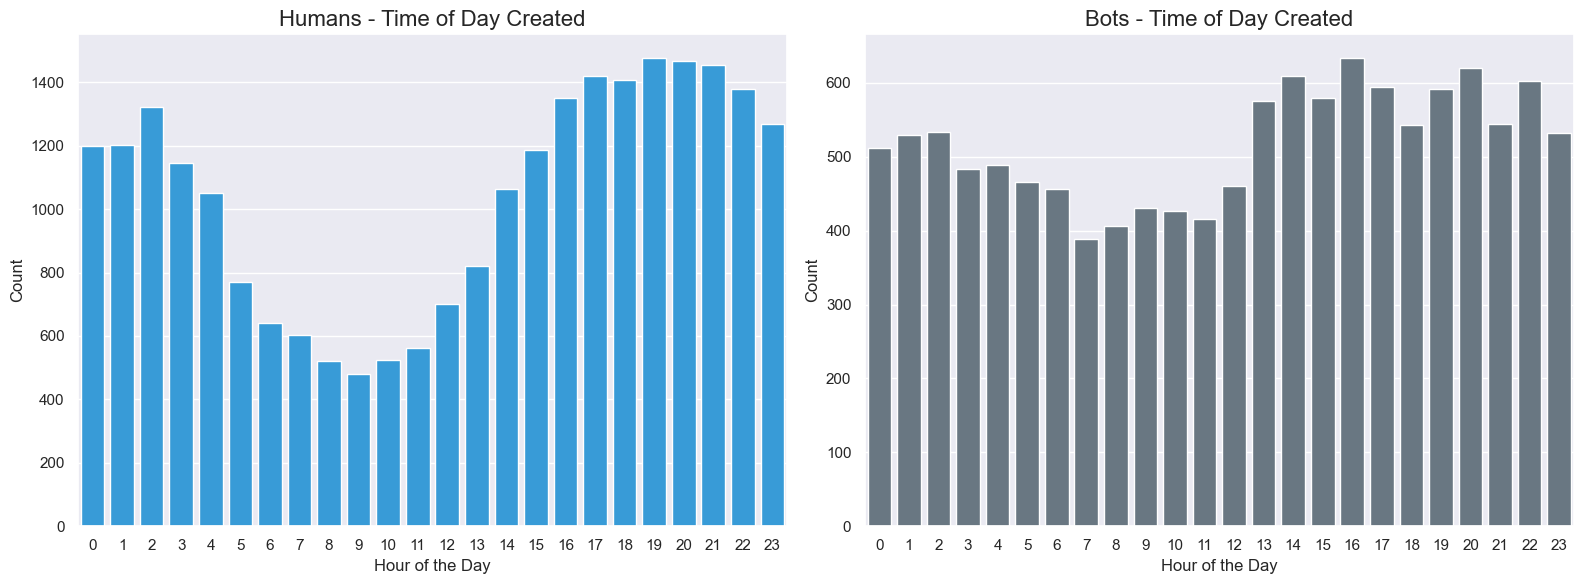

In [34]:
# Time of day accounts were created
df['created_at'] = pd.to_datetime(df['created_at'])
human_accs = df[df['account_type'] == 'human']
bot_accs = df[df['account_type'] == 'bot']
human_hours = [date.hour for date in human_accs['created_at']]
bot_hours = [date.hour for date in bot_accs['created_at']]

# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.set_theme()

# Humans
sns.countplot(x=human_hours, color=TWITTER_BLUE, ax=axes[0])
axes[0].set_title('Humans - Time of Day Created', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Bots
sns.countplot(x=bot_hours, color=TWITTER_GRAY, ax=axes[1])
axes[1].set_title('Bots - Time of Day Created', fontsize=16)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

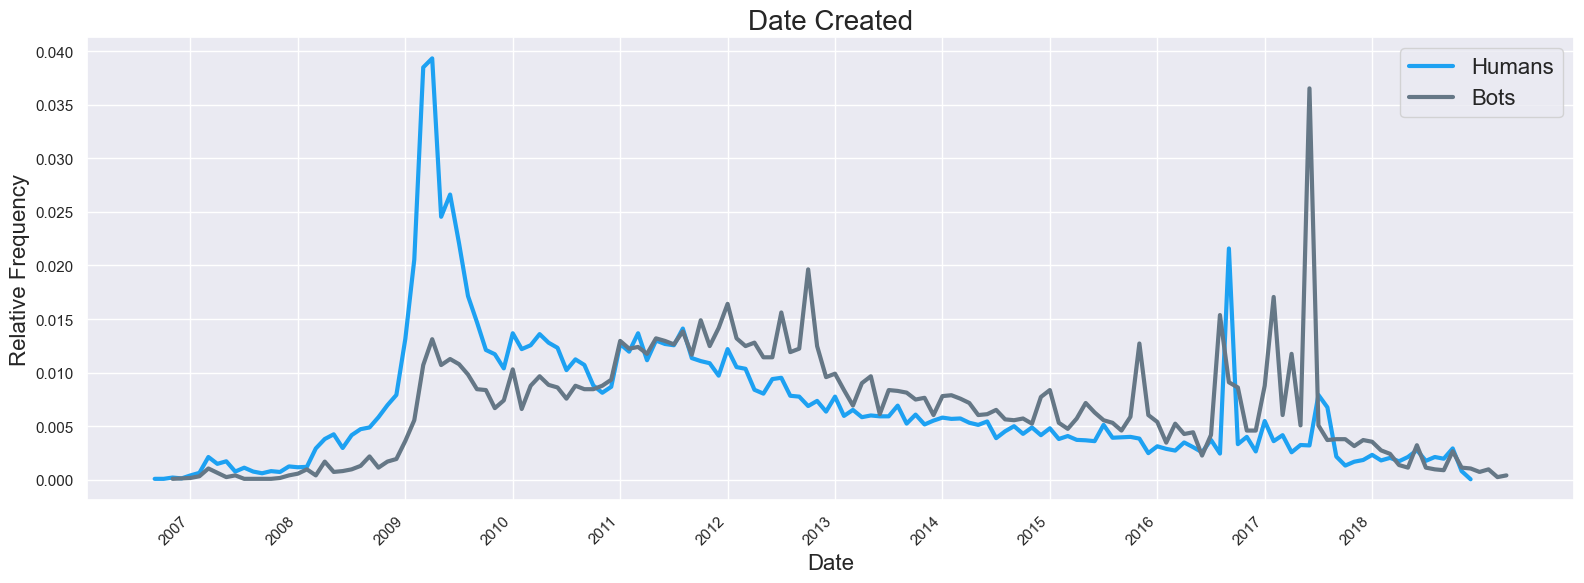

In [35]:
# Distribution of dates accounts created
def date_relative_freq(df):
    month_year = df['created_at'].dt.to_period('M')
    count_by_month_year = month_year.value_counts().sort_index()
    relative_frequency = count_by_month_year / len(df)
    return relative_frequency

df['created_at'] = pd.to_datetime(df['created_at'])
human_date_freq = date_relative_freq(human_accs)
bot_date_freq = date_relative_freq(bot_accs)

# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(x=human_date_freq.index.astype(str), y=human_date_freq.values, 
                marker='', linewidth=3, color=TWITTER_BLUE, label='Humans')
sns.lineplot(x=bot_date_freq.index.astype(str), y=bot_date_freq.values, 
                marker='', linewidth=3, color=TWITTER_GRAY, label='Bots')
plt.title('Date Created', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Relative Frequency', fontsize=16)
tick_positions = [str(period) for period in human_date_freq.index if period.month == 1]
tick_labels = [period.year for period in human_date_freq.index if period.month == 1]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

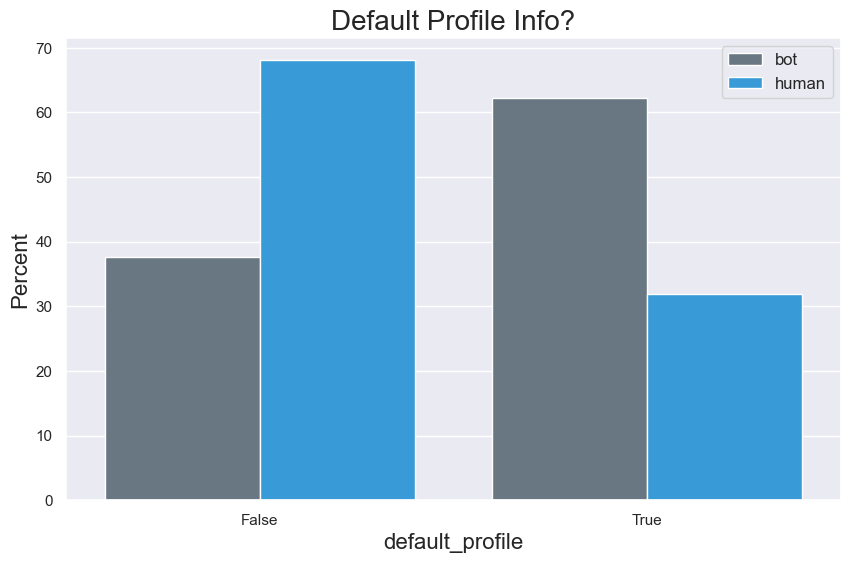

In [36]:
def grouped_count_plot(df, feature, title):
    # Calculate relative frequencies
    total_counts = len(df)
    relative_frequencies = df.groupby(['account_type', feature]).size().unstack(fill_value=0)
    relative_frequencies = relative_frequencies.div(relative_frequencies.sum(axis=1), axis=0) * 100

    # Plot
    sns.set_theme()
    plt.figure(figsize=(10, 6))
    df_plot = relative_frequencies.reset_index().melt(id_vars='account_type', var_name=feature, value_name='Relative Frequency')
    sns.barplot(x=feature, y='Relative Frequency', hue='account_type', 
                data=df_plot, palette=[TWITTER_GRAY, TWITTER_BLUE])
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Percent', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

# Default profile info
grouped_count_plot(df, feature='default_profile', title='Default Profile Info?')

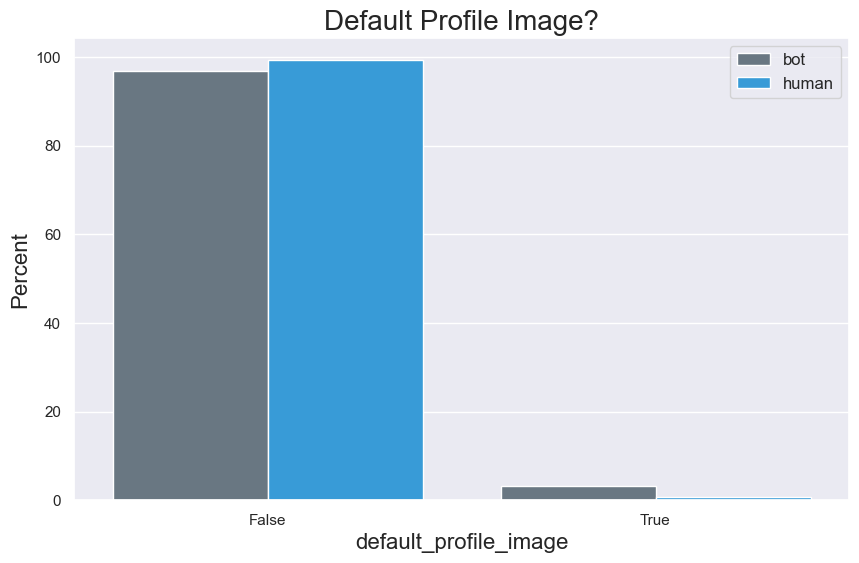

In [37]:
# Default profile image
grouped_count_plot(df, feature='default_profile_image', title='Default Profile Image?')

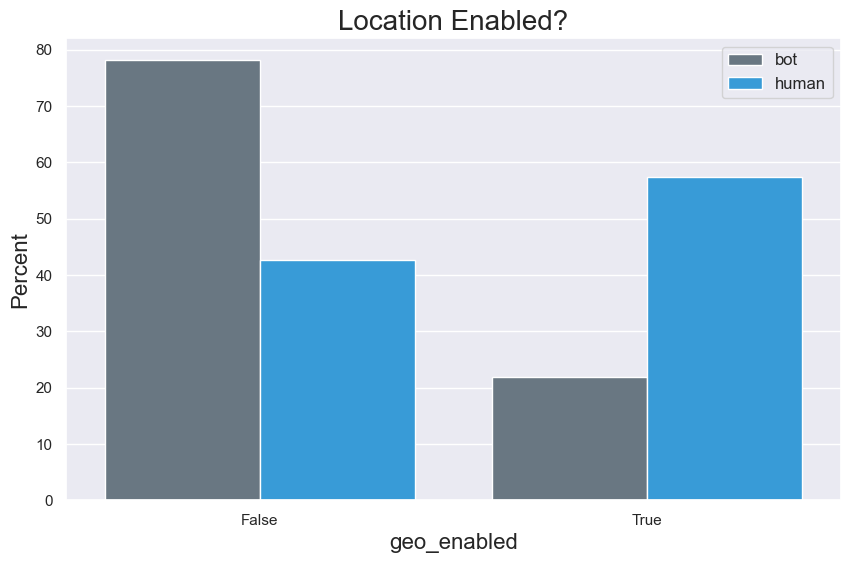

In [38]:
# Location enabled
grouped_count_plot(df, feature='geo_enabled', title='Location Enabled?')

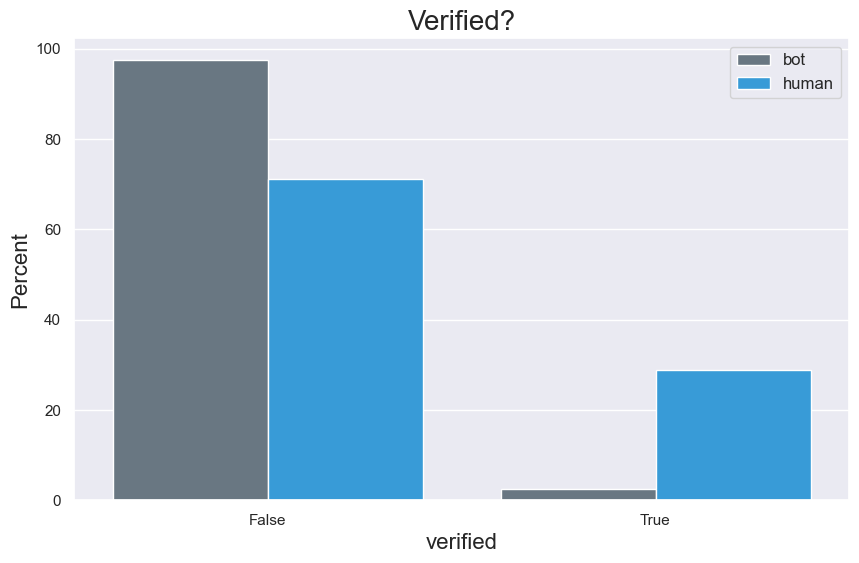

In [39]:
# Verified
grouped_count_plot(df, feature='verified', title='Verified?')

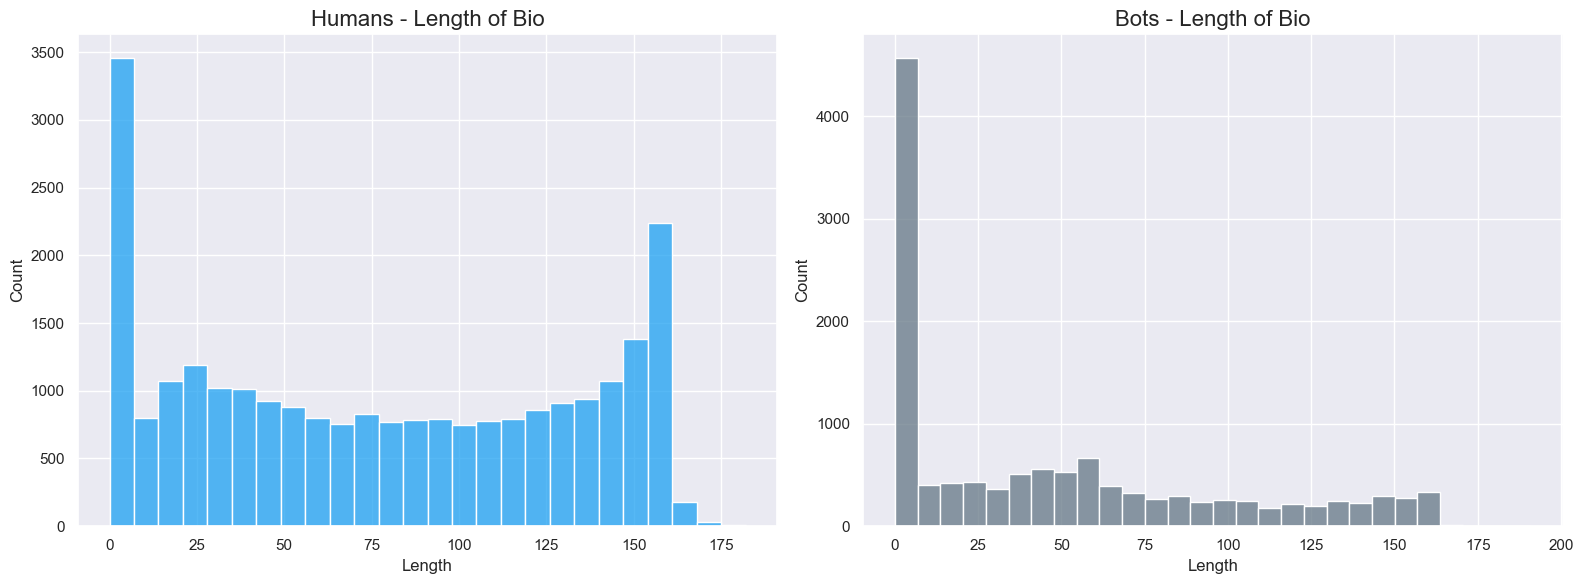

In [40]:
# Number of characters in bio
human_desc_lengths = [len(str(desc)) if not pd.isna(desc) else 0 for desc in human_accs['description']]
bot_desc_lengths = [len(str(desc)) if not pd.isna(desc) else 0 for desc in bot_accs['description']]

# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.set_theme()

# Humans
sns.histplot(x=human_desc_lengths, color=TWITTER_BLUE, ax=axes[0])
axes[0].set_title('Humans - Length of Bio', fontsize=16)
axes[0].set_xlabel('Length', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Bots
sns.histplot(x=bot_desc_lengths, color=TWITTER_GRAY, ax=axes[1])
axes[1].set_title('Bots - Length of Bio', fontsize=16)
axes[1].set_xlabel('Length', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

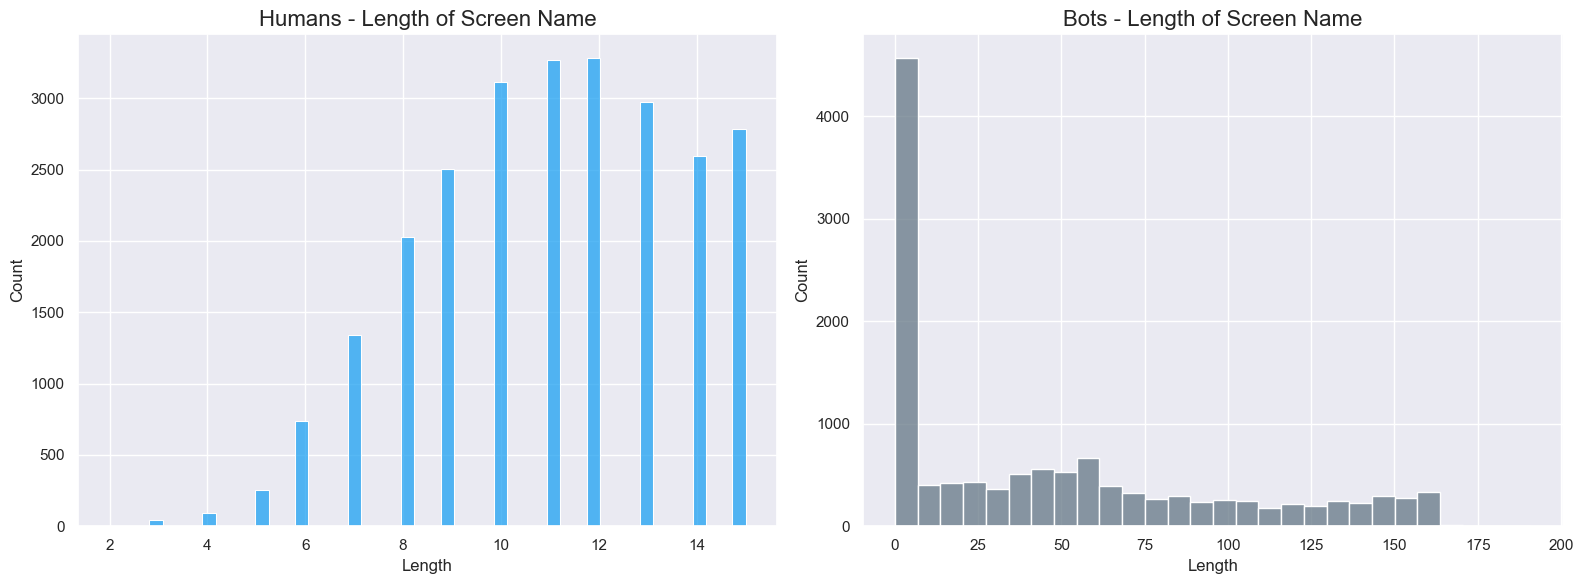

In [41]:
# Number of characters in screen name
human_name_lengths = [len(str(name)) if not pd.isna(name) else 0 for name in human_accs['screen_name']]
bot_name_lengths = [len(str(name)) if not pd.isna(name) else 0 for name in bot_accs['screen_name']]

# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.set_theme()

# Humans
sns.histplot(x=human_name_lengths, color=TWITTER_BLUE, ax=axes[0])
axes[0].set_title('Humans - Length of Screen Name', fontsize=16)
axes[0].set_xlabel('Length', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Bots
sns.histplot(x=bot_desc_lengths, color=TWITTER_GRAY, ax=axes[1])
axes[1].set_title('Bots - Length of Screen Name', fontsize=16)
axes[1].set_xlabel('Length', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Min: 0
Max: 885123
p-value (Bots) = 0.0
p-value (Humans) = 0.004287890471886659


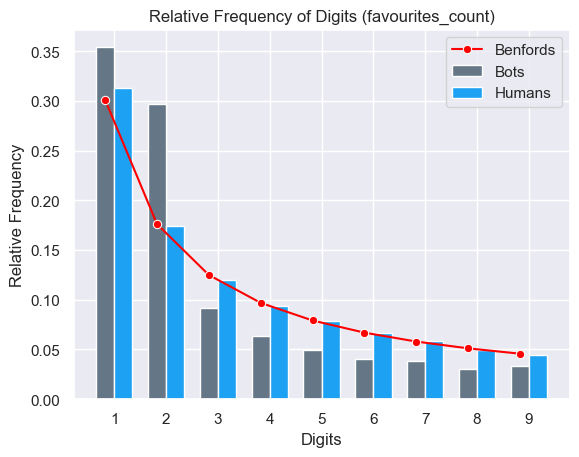

In [42]:
def get_benfords_distribution():
    # Benford's Law distribution for the first digit
    benfords_distribution = np.array([np.log10(1 + 1 / i) for i in range(1, 10)])
    benfords_distribution /= benfords_distribution.sum()
    return benfords_distribution

def chi_square_test(observed_counts):
    benfords_distribution = get_benfords_distribution()
    observed_counts = list(observed_counts)
    expected_counts = benfords_distribution * sum(observed_counts)

    chi2, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    return chi2, p_value

def get_digit_freqs(feature):
    bots_feature = bot_accs[feature]
    human_feature = human_accs[feature]
    bots_digit_counts = {str(digit): bots_feature.astype(str).str.startswith(str(digit)).sum() for digit in range(1,10)}
    human_digit_counts = {str(digit): human_feature.astype(str).str.startswith(str(digit)).sum() for digit in range(1,10)}
    return bots_digit_counts, human_digit_counts

def plot_digit_distribution(df, feature, bots_digit_counts, humans_digit_counts):
    # Verify range meets Benford law assumptions
    print('Min:', min(df[feature]))
    print('Max:', max(df[feature]))

    total_bots = sum(bots_digit_counts.values())
    total_humans = sum(humans_digit_counts.values())
    bots_relative_freq = {digit: count / total_bots for digit, count in bots_digit_counts.items()}
    humans_relative_freq = {digit: count / total_humans for digit, count in humans_digit_counts.items()}

    # Plot relative frequencies
    digits = list(bots_relative_freq.keys())
    bot_freq_values = list(bots_relative_freq.values())
    human_freq_values = list(humans_relative_freq.values())
    bar_width = 0.35
    index = np.arange(len(digits))
    sns.set_theme()
    plt.bar(index, bot_freq_values, bar_width, label='Bots', color=TWITTER_GRAY)
    plt.bar(index + bar_width, human_freq_values, bar_width, label='Humans', color=TWITTER_BLUE)

    sns.lineplot(x=range(0,9), y=get_benfords_distribution(), marker='o', color='red', label='Benfords')

    plt.xlabel('Digits')
    plt.ylabel('Relative Frequency')
    plt.title('Relative Frequency of Digits ({})'.format(feature))
    plt.xticks(index + bar_width / 2, digits)
    plt.legend()

def benfords_analysis(feature):
    bots_digit_counts, humans_digit_counts = get_digit_freqs(feature)
    plot_digit_distribution(df, feature, bots_digit_counts, humans_digit_counts)
    _, bot_p_value = chi_square_test(bots_digit_counts.values())
    _, human_p_value = chi_square_test(humans_digit_counts.values())
    print('p-value (Bots) = {}'.format(bot_p_value))
    print('p-value (Humans) = {}'.format(human_p_value))

benfords_analysis('favourites_count')

Min: 0
Max: 2771910
p-value (Bots) = 3.78458917368367e-199
p-value (Humans) = 8.027514659073048e-13


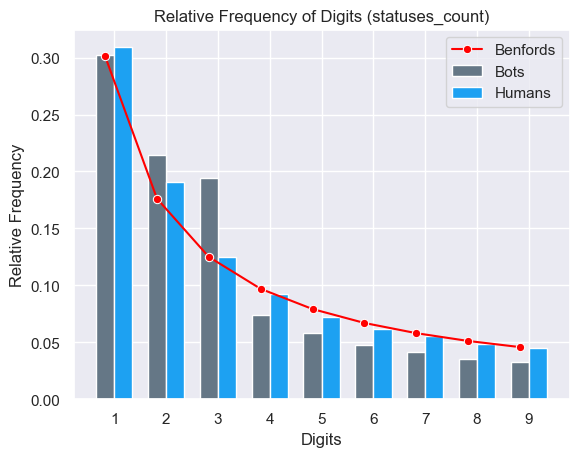

In [43]:
benfords_analysis(feature='statuses_count')

Min: 0
Max: 4343060
p-value (Bots) = 0.001206286186641812
p-value (Humans) = 2.091065423982238e-14


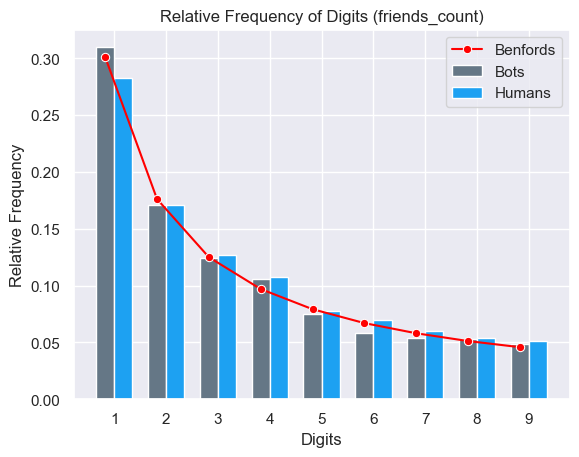

In [44]:
benfords_analysis(feature='friends_count')

Min: 0
Max: 121641473
p-value (Bots) = 1.3306753722017667e-33
p-value (Humans) = 2.0296205051461115e-09


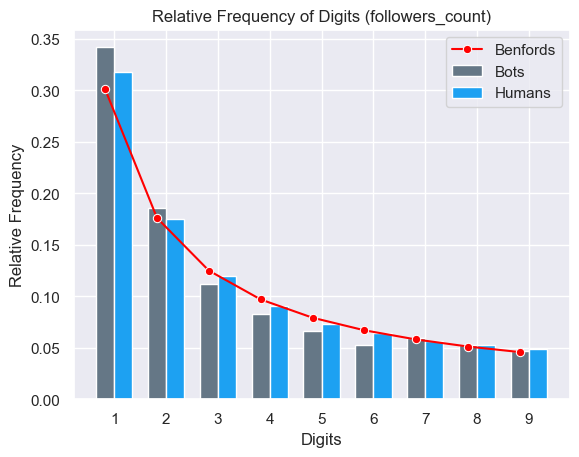

In [45]:
benfords_analysis(feature='followers_count')